<center>
<h1 style="font-family: 'Times New Roman', Times, serif; font-size: 60px;">DAA</h1>
<h2 style="font-family: 'Times New Roman', Times, serif; font-size: 40px;">Data Analysis After Pre Processing</h2>
</center>

<font face="Times New Roman">

<h3 style="font-family: 'Times New Roman'">Imports</h3>

In [13]:
# Import necessary libraries
import pandas as pd                                         # Import pandas for data manipulation and analysis
import numpy as np                                          # Import numpy for numerical computations
import matplotlib.pyplot as plt                             # Import matplotlib for data visualization
from sklearn.feature_selection import mutual_info_classif   # Import mutual_info_classif for feature selection based on mutual information
import seaborn as sns                                       # Import seaborn for enhanced data visualization                 

<h3 style="font-family: 'Times New Roman'">Load All Datasets</h3>

In [14]:
final = pd.read_csv('Ficheiros/Ficheiros_Pos_Pre_Processing/final.csv', na_filter=False)

In [15]:
final_teste = pd.read_csv('Ficheiros/Ficheiros_Pos_Pre_Processing/final_teste.csv')

<h3 style="font-family: 'Times New Roman'">Data Exploration After Pre-Processing</h3>

In [16]:
final.drop(columns=['date', 'hour_str', 'Data'], inplace=True)

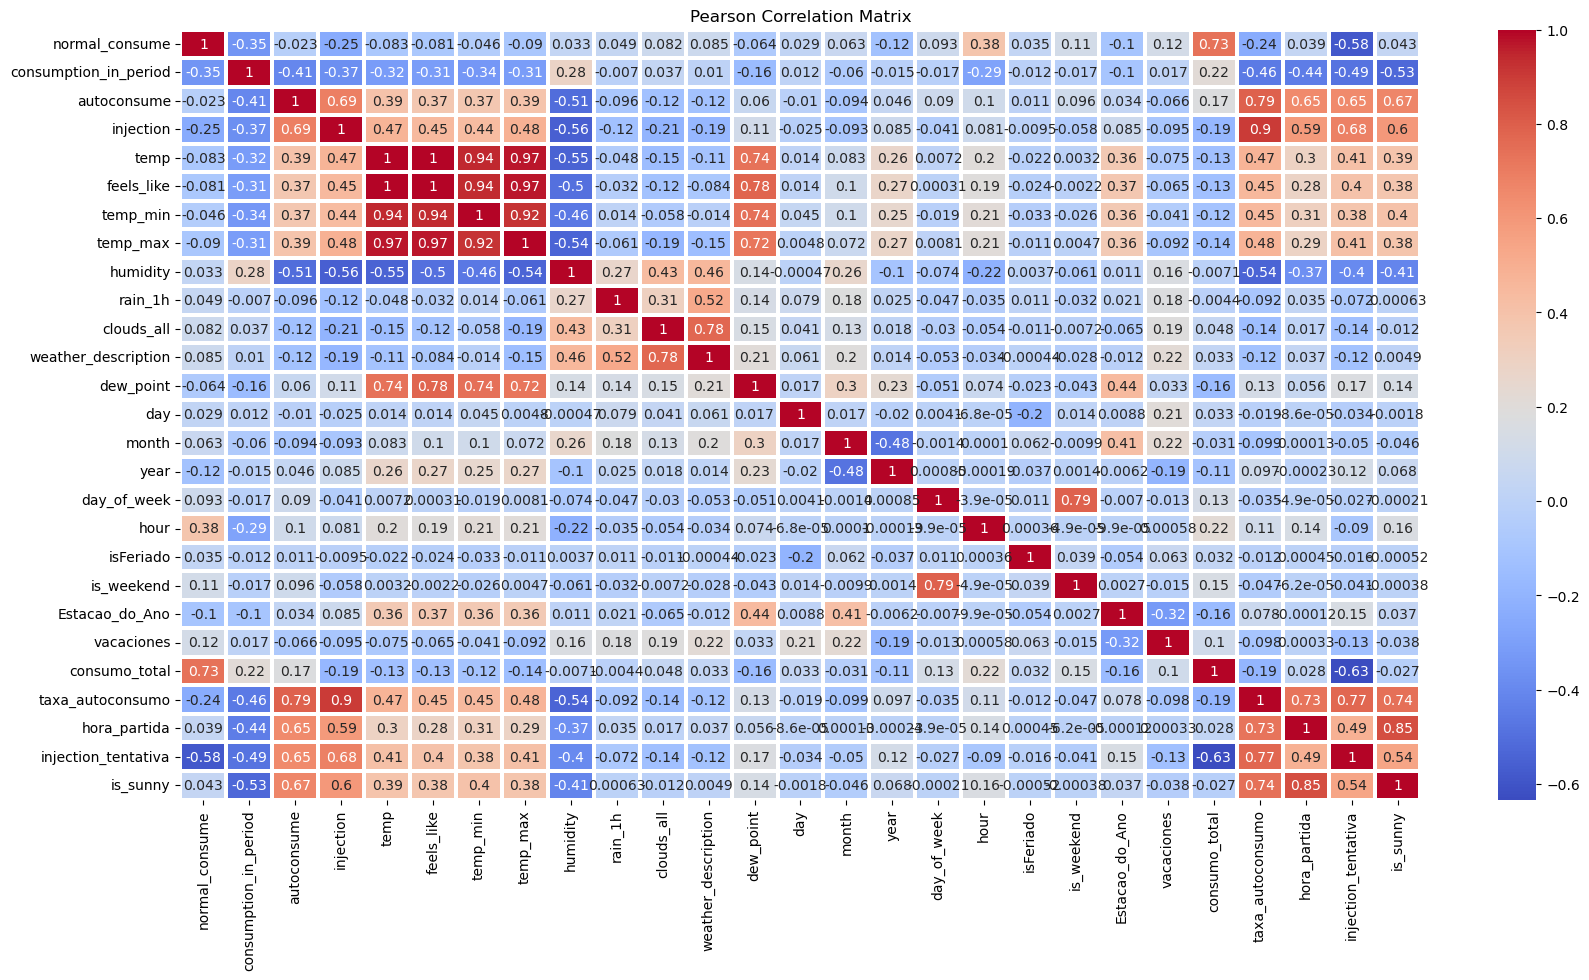

In [17]:
correlation_matrix = final.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title("Pearson Correlation Matrix")
plt.show()

                  Feature  Mutual_Information
22       taxa_autoconsumo            0.605138
24    injection_tentativa            0.547492
2             autoconsume            0.501857
16                   hour            0.377909
25               is_sunny            0.266221
23           hora_partida            0.262644
1   consumption_in_period            0.195422
0          normal_consume            0.194878
7                humidity            0.168531
5                temp_min            0.145199
3                    temp            0.132283
6                temp_max            0.130802
4              feels_like            0.115751
21          consumo_total            0.055184
13                  month            0.042159
9              clouds_all            0.035474
10    weather_description            0.034298
11              dew_point            0.025304
19         Estacao_do_Ano            0.022351
8                 rain_1h            0.021397
15            day_of_week         

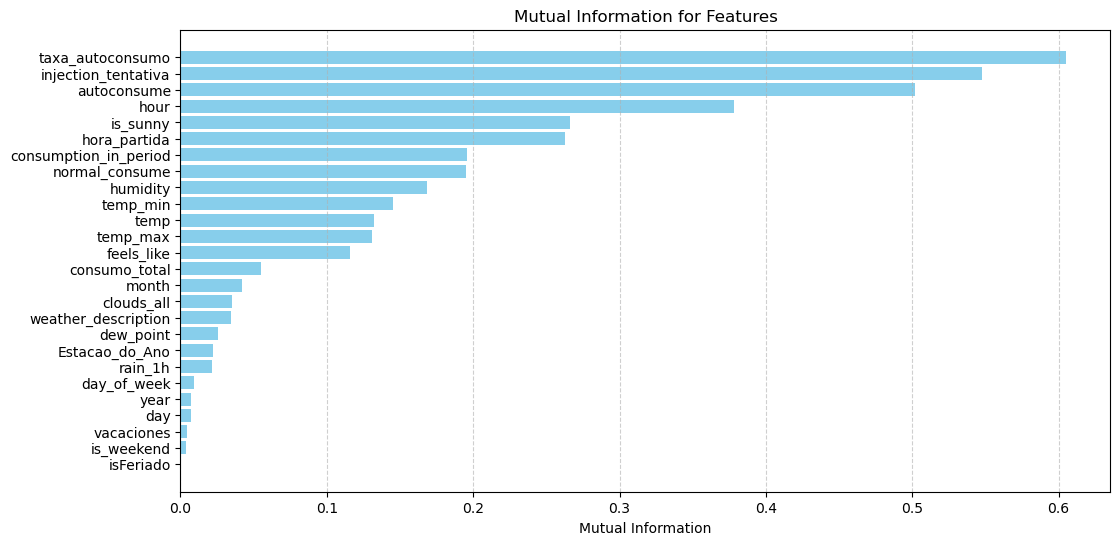

In [18]:
target = final['injection']

# Drop the target columns from the features
features = final.drop(['injection'], axis=1)

# Calculate mutual information for each feature with respect to the target variables
mi = mutual_info_classif(features, target, discrete_features='auto', random_state=2024)

# Create DataFrames to show the results
mi_results = pd.DataFrame({'Feature': features.columns, 'Mutual_Information': mi})

# Display the results
print(mi_results.sort_values(by='Mutual_Information', ascending=False))

# Order the features by mutual information for 'smoking_state'
sorted_mi = mi_results.sort_values(by='Mutual_Information', ascending=False)

# Plot for 'smoking_state'
plt.figure(figsize=(12, 6))
plt.barh(sorted_mi['Feature'], sorted_mi['Mutual_Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information for Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<h3 style="font-family: 'Times New Roman'">Descriptive Statistics After Pre-Processing</h3>

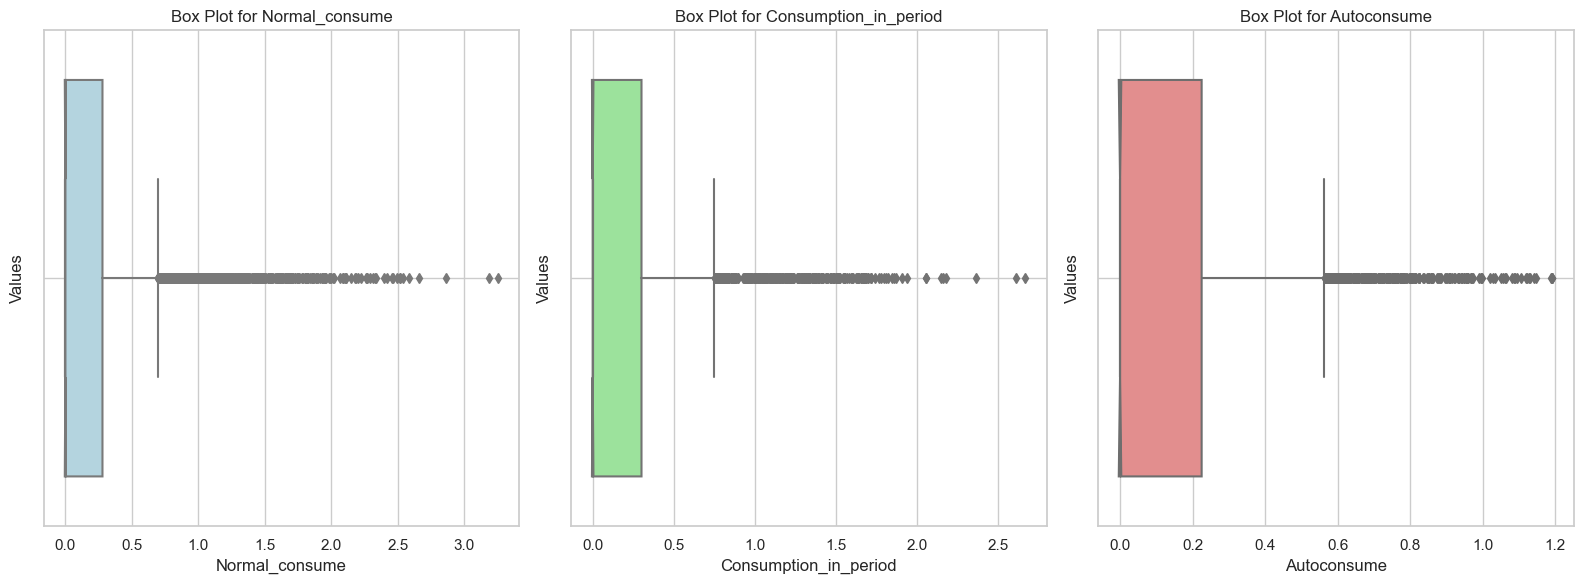

In [39]:
# First Boxplot
variable_name_1 = 'normal_consume'
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.boxplot(x=final[variable_name_1], color='lightblue', notch=True)
plt.xlabel(f'{variable_name_1.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_1.capitalize()}')
plt.grid(True)

# Second Boxplot
variable_name_2 = 'consumption_in_period'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.boxplot(x=final[variable_name_2], color='lightgreen', notch=True)
plt.xlabel(f'{variable_name_2.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_2.capitalize()}')
plt.grid(True)

# Third Boxplot
variable_name_3 = 'autoconsume'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
sns.boxplot(x=final[variable_name_3], color='lightcoral', notch=True)
plt.xlabel(f'{variable_name_3.capitalize()}')
plt.ylabel('Values')
plt.title(f'Box Plot for {variable_name_3.capitalize()}')
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

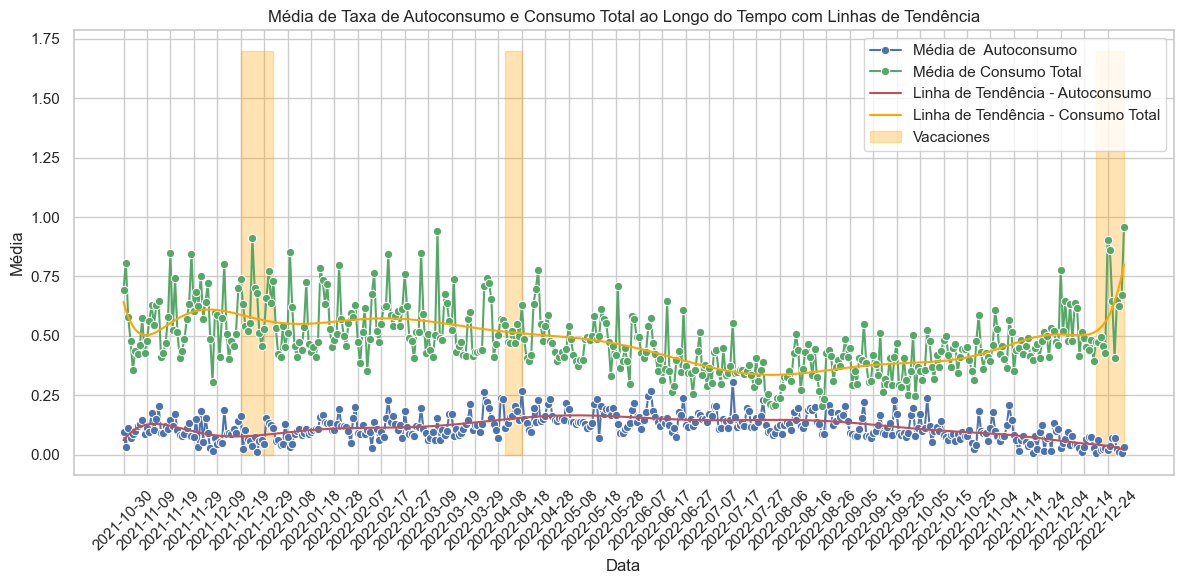

In [40]:
# Agrupar os dados pela data e calcular a média da taxa de autoconsumo e do consumo total
df_grouped = final.groupby('Data').agg({'autoconsume': 'mean', 'consumo_total': 'mean', 'vacaciones': 'sum'}).reset_index()

# Ajustar um polinômio aos dados para a taxa de autoconsumo
coefficients_autoconsumo = np.polyfit(df_grouped.index, df_grouped['autoconsume'], 13)
polynomial_autoconsumo = np.poly1d(coefficients_autoconsumo)

# Ajustar um polinômio aos dados para o consumo total
coefficients_consumo_total = np.polyfit(df_grouped.index, df_grouped['consumo_total'], 13)
polynomial_consumo_total = np.poly1d(coefficients_consumo_total)

# Gerar valores x para as linhas de tendência
x_values = np.linspace(df_grouped.index.min(), df_grouped.index.max(), 100)

# Calcular valores y usando os polinômios
y_values_autoconsumo = polynomial_autoconsumo(x_values)
y_values_consumo_total = polynomial_consumo_total(x_values)

# Configurar o estilo do gráfico usando o Seaborn (opcional, mas melhora a aparência)
sns.set(style="whitegrid")

# Criar a visualização
plt.figure(figsize=(12, 6))

# Plotar a média da taxa de autoconsumo ao longo do tempo
sns.lineplot(x='Data', y='autoconsume', data=df_grouped, marker='o', color='b', label='Média de  Autoconsumo')

# Plotar a linha de tendência para o consumo total
sns.lineplot(x='Data', y='consumo_total', data=df_grouped, marker='o', color='g', label='Média de Consumo Total')

# Plotar a linha de tendência para a taxa de autoconsumo
plt.plot(df_grouped['Data'], polynomial_autoconsumo(df_grouped.index), label='Linha de Tendência - Autoconsumo', color='r')

# Plotar a linha de tendência para o consumo total
plt.plot(df_grouped['Data'], polynomial_consumo_total(df_grouped.index), label='Linha de Tendência - Consumo Total', color='orange')

# Destacar fins de semana com uma área sombreada
plt.fill_between(df_grouped['Data'], 0, 1.7, where=df_grouped['vacaciones'], color='orange', alpha=0.3, label='Vacaciones')

# Personalizar o gráfico
plt.title('Média de Taxa de Autoconsumo e Consumo Total ao Longo do Tempo com Linhas de Tendência')
plt.xlabel('Data')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(df_grouped), 10), df_grouped['Data'][::10])

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [41]:
final.columns

Index(['date', 'normal_consume', 'consumption_in_period', 'autoconsume',
       'injection', 'temp', 'feels_like', 'temp_min', 'temp_max', 'humidity',
       'rain_1h', 'clouds_all', 'weather_description', 'dew_point', 'day',
       'month', 'year', 'day_of_week', 'hour', 'isFeriado', 'hour_str', 'Data',
       'is_weekend', 'Estacao_do_Ano', 'vacaciones', 'consumo_total',
       'taxa_autoconsumo', 'hora_partida', 'injection_tentativa', 'is_sunny'],
      dtype='object')

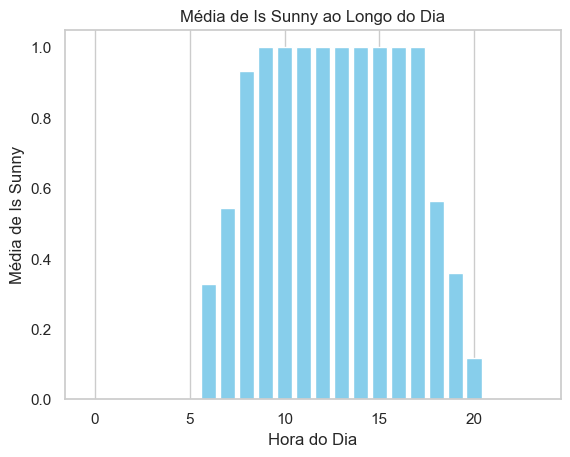

In [42]:
mean_is_sunny_by_hour = final.groupby('hour')['is_sunny'].mean()

# Plotar o gráfico de barras
plt.bar(mean_is_sunny_by_hour.index, mean_is_sunny_by_hour, color='skyblue')
plt.title('Média de Is Sunny ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Média de Is Sunny')
plt.grid(axis='y')
plt.show()

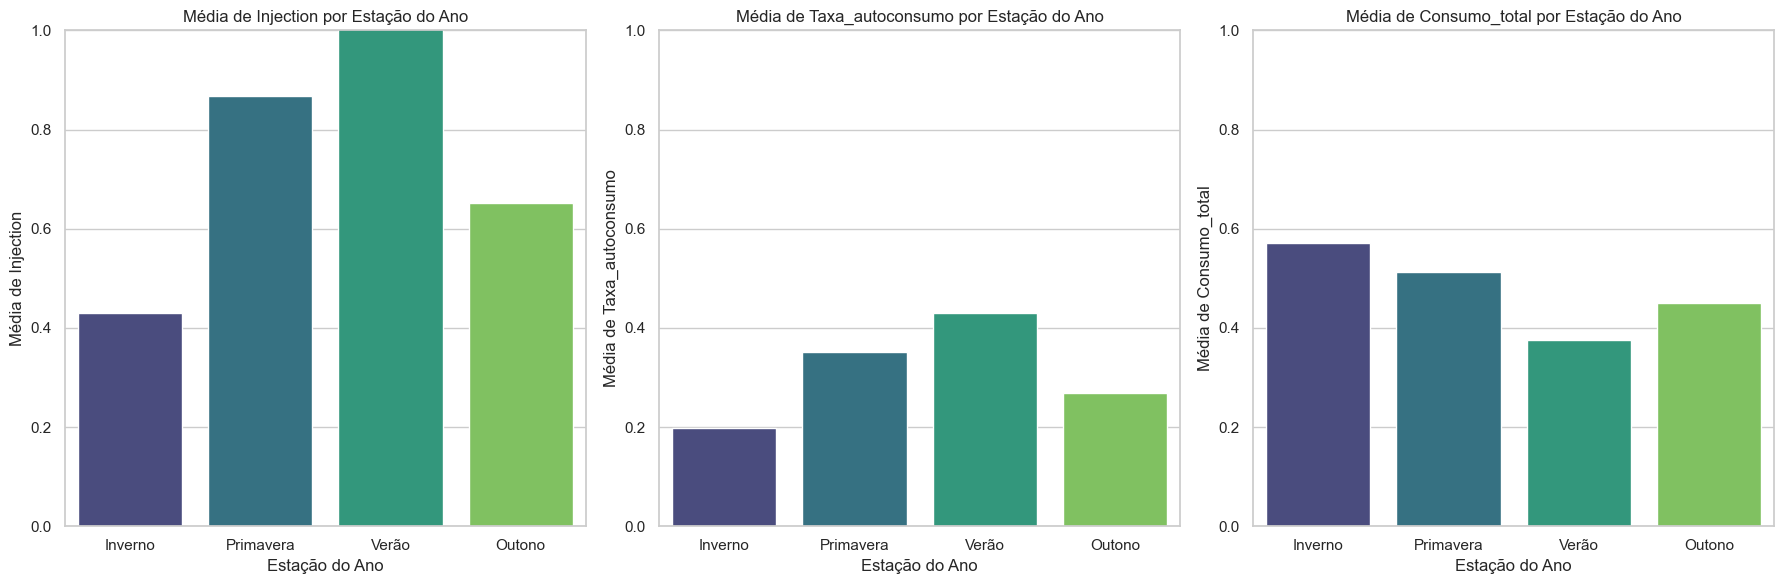

In [43]:
# Mapear os rótulos numéricos para os nomes das estações do ano
estacoes_do_ano = {0: 'Inverno', 1: 'Primavera', 2: 'Verão', 3: 'Outono'}

# Configurar o estilo do gráfico usando o Seaborn (opcional, mas melhora a aparência)
sns.set(style="whitegrid")

# Criar a visualização com três subgráficos lado a lado
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Lista das colunas que queremos plotar
colunas = ['injection', 'taxa_autoconsumo', 'consumo_total']

for i, coluna in enumerate(colunas):
    # Calcular a média para cada estação do ano
    media_por_estacao = final.groupby('Estacao_do_Ano')[coluna].mean().reset_index()

    # Plotar um gráfico de barras
    sns.barplot(x='Estacao_do_Ano', y=coluna, data=media_por_estacao, palette='viridis', ax=axes[i])

    # Personalizar o gráfico
    axes[i].set_title(f'Média de {coluna.capitalize()} por Estação do Ano')
    axes[i].set_xlabel('Estação do Ano')
    axes[i].set_ylabel(f'Média de {coluna.capitalize()}')
    axes[i].set_ylim(0, 1)  # Definir o limite do eixo y se a média estiver entre 0 e 1

    # Substituir os rótulos numéricos pelos nomes das estações do ano na legenda
    axes[i].set_xticks(ticks=range(4))
    axes[i].set_xticklabels([estacoes_do_ano[j] for j in range(4)])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

<h3 style="font-family: 'Times New Roman'">Save DataSet</h3>

In [44]:
final.to_csv("Ficheiros/Ficheiros_Pos_DataAnalysis_After_PP/Final.csv", index=False)
final_teste.to_csv("Ficheiros/Ficheiros_Pos_DataAnalysis_After_PP/Final_Teste.csv", index=False)